In [27]:
import sqlite3
import pandas as pd

# DISS, STWMRKT, IPSWICH, MANNGTR, STFD, LIVST     SHENFLD, NRCH
conn = sqlite3.connect("..\data\dataset.sqlite")
df = pd.read_sql_query("""SELECT * FROM dataset WHERE tpl_from="DISS" 
                          AND tpl_to="NRCH" AND delay_change<=5 AND delay_change>=-5 """, conn)
conn.close()
df.head

<bound method NDFrame.head of       tpl_from tpl_to  day_of_week  weekday  off_peak  hour_of_day  delay  \
0         DISS   NRCH            6        0         1            7      3   
1         DISS   NRCH            6        0         1            8      1   
2         DISS   NRCH            6        0         1            9      1   
3         DISS   NRCH            6        0         1           10      1   
4         DISS   NRCH            6        0         1           11      0   
...        ...    ...          ...      ...       ...          ...    ...   
24942     DISS   NRCH            2        1         0           19      5   
24943     DISS   NRCH            2        1         1           20      4   
24944     DISS   NRCH            2        1         1           21      3   
24945     DISS   NRCH            2        1         1           22     -2   
24946     DISS   NRCH            2        1         1           23     -1   

       delay_change  
0                 2  
1

In [28]:
# preprocessing - splitting attributes (x) and labels (y)
x = df.iloc[:, 2:-1].values
y = df.iloc[:, 7].values

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_squared_error, accuracy_score

r2  = []
mse = []
acc = []

for i in range(100):
    # train/test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

    # scale
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)

    # classify
    classifier = KNeighborsClassifier(n_neighbors=30, p=1)
    classifier.fit(x_train, y_train)

    # predict
    y_pred = classifier.predict(x_test)

    # evaluate
    r2.append(r2_score(y_test, y_pred))
    mse.append(mean_squared_error(y_test, y_pred))
    acc.append(accuracy_score(y_test, y_pred))

In [30]:
from math import sqrt
# cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# print(cm)
print("acc  = {:.4f}".format(sum(acc) / len(acc)))
print("r2   = {:.4f}".format(sum(r2) / len(r2)))
avg_mse = sum(mse) / len(mse)
print("MSE  = {:.4f}".format(avg_mse))
print("RMSE = {:.4f}".format(sqrt(avg_mse)))
print(cr)

acc  = 0.5113
r2   = 0.2200
MSE  = 0.8903
RMSE = 0.9436
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         6
          -1       0.67      0.05      0.09        40
           0       0.65      0.50      0.57       437
           1       0.46      0.59      0.52       837
           2       0.48      0.62      0.54       829
           3       0.23      0.03      0.05       248
           4       0.00      0.00      0.00        70
           5       0.00      0.00      0.00        28

    accuracy                           0.49      2495
   macro avg       0.31      0.22      0.22      2495
weighted avg       0.46      0.49      0.46      2495



Evaluate K value between 1 and 100 and plot the results

Text(0, 0.5, 'Mean Error')

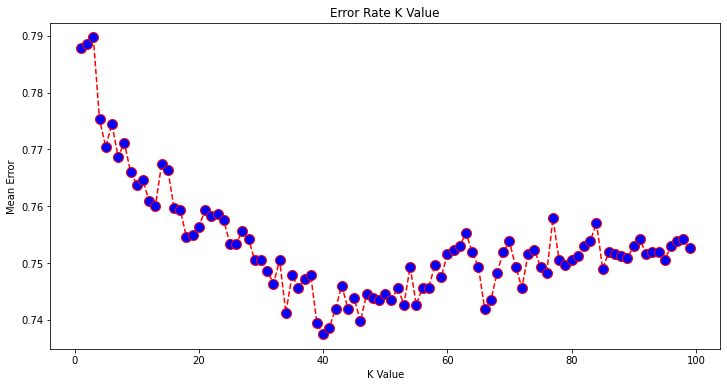

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# error = []
# for i in range(1, 100):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(x_train, y_train)
#     pred_i = knn.predict(x_test)
#     error.append(np.mean(pred_i != y_test))

# plt.figure(figsize=(12, 6))
# plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',
#          markerfacecolor='blue', markersize=10)
# plt.title('Error Rate K Value')
# plt.xlabel('K Value')
# plt.ylabel('Mean Error')

In [102]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("..\data\db.sqlite")
df = pd.read_sql_query("""SELECT * FROM model2_1 WHERE delay<-20""", conn)
conn.close()
df.head

<bound method NDFrame.head of    tpl_from   tpl_to  day_of_week  weekday  off_peak  hour_of_day  \
0      NRCH     DISS            1        1         1           14   
1      NRCH     DISS            6        0         1           10   
2     LIVST  BTHNLGR            1        1         1           23   
3   BTHNLGR    LIVST            3        1         1            0   
4     LIVST  BTHNLGR            3        1         1            0   
5   STWMRKT  NEEDHAM            7        0         1            8   
6   MANNGTR  CLCHSTR            4        1         1           20   
7   CLCHSTR  MRKSTEY            4        1         1           20   
8   MRKSTEY  KELVEDN            4        1         1           21   
9   WITHAME  HFLPEVL            4        1         1           21   
10  CHLMSFD  INGTSTN            4        1         1           21   
11  SHENFLD  BRTWOOD            4        1         1           21   
12  BRTWOOD  HRLDWOD            4        1         1           21   
13  

In [99]:
conn = sqlite3.connect("..\data\db.sqlite")
df = pd.read_sql_query("""SELECT * FROM model2_1 WHERE rid=201901147628975 """, conn)
conn.close()
df.head

<bound method NDFrame.head of    tpl_from   tpl_to  day_of_week  weekday  off_peak  hour_of_day  \
0      NRCH     DISS            1        1         1           21   
1      DISS  STWMRKT            1        1         1           21   
2   STWMRKT  NEEDHAM            1        1         1           21   
3   IPSWICH  MANNGTR            1        1         1           21   
4   MANNGTR  CLCHSTR            1        1         1           21   
5   CLCHSTR  MRKSTEY            1        1         1           22   
6   MRKSTEY  KELVEDN            1        1         1           22   
7   WITHAME  HFLPEVL            1        1         1           22   
8   CHLMSFD  INGTSTN            1        1         1           22   
9   SHENFLD  BRTWOOD            1        1         1           22   
10  BRTWOOD  HRLDWOD            1        1         1           22   
11  HRLDWOD  GIDEAPK            1        1         1           22   
12  GIDEAPK  ROMFORD            1        1         1           22   
13  

In [60]:
import sqlite3
import pandas as pd
from sklearn.preprocessing import StandardScaler

conn = sqlite3.connect("..\data\db.sqlite")
# df = pd.read_sql_query("""SELECT * FROM dataset WHERE tpl_from="STFD" AND tpl_to="SHENFLD" """, conn)
df = pd.read_sql_query("""SELECT name FROM stations WHERE name LIKE "%shrew%" """, conn)
conn.close()
df.head



<bound method NDFrame.head of          name
0  Shrewsbury>

In [16]:
# preprocessing - splitting attributes (x) and labels (y)
x = df.iloc[:, 2:-1].values
y = df.iloc[:, 7].values

# feature scaling
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
print(x)

[[-0.83497076  0.37837478  0.76749141 -0.90904152  4.48419128]
 [ 0.32543568  0.37837478 -1.30294618 -1.31087825  4.48419128]
 [-0.25476754  0.37837478 -1.30294618 -1.10995989  4.48419128]
 ...
 [-0.83497076  0.37837478  0.76749141  1.10014214 -0.2282745 ]
 [-0.83497076  0.37837478  0.76749141  1.30106051 -0.38535669]
 [-0.83497076  0.37837478  0.76749141  1.50197887 -0.38535669]]
